
# Task 1: Permutations and Combinations

_Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first_.

- _Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells._

### Steps:
1. Calculate the total number of ways to select 6 cups from 12.
2. Calculate the successful ways for different scenarios (6/5/4 correct attempts).
3. Sum up the successful ways.
4. Calculate the probability.


In [168]:
import math
from scipy.special import comb 


total_cups = 12  # Total number of cups
milk_cups = 6  # Number of cups with milk added first
tea_cups = 6  # Number of cups with tea added first
all_attempts = comb(total_cups, milk_cups)
probability = 1 / all_attempts

print(f"Probability of selecting all 6 milk-first cups correctly: {probability:.10f}")


Probability of selecting all 6 milk-first cups correctly: 0.0010822511


- _Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error._

In [169]:
# Calculate the number of ways she has to select exactly 5 correct and 1 incorrect (combination)
five_correct_cups = comb(6, 5) * comb(6, 1) 

# Calculate the number of ways to select all 6 cups correctly
six_correct_cups = 1  # There is only one way to pick all 6 correctly as only 6 cups have milk in first

# Total successful ways 
successful_ways = five_correct_cups + six_correct_cups

# Probability of selecting at least 5 correct cups
probability_five_cups_correct= successful_ways / all_attempts

print(f"Probability of selecting at least 5 correct cups: {probability_five_cups_correct:.10f}")


Probability of selecting at least 5 correct cups: 0.0400432900


- _Would you accept two errors? Explain_.

Allowing two errors would mean calculating the probability of selecting at least four correct cups out of six, which would increase the probability of a correct guess. However, allowing more errors lowers the test’s reliability, making it easier for the lady to guess the tea that has the tea in first. 

In [170]:
# Calculate the number of ways to select exactly 4 correct and 2 incorrect (combination)
four_correct_cups = comb(milk_cups, 4) * comb(tea_cups, 2) 
successful_ways = four_correct_cups + five_correct_cups + six_correct_cups
probability_four_cups_correct = successful_ways / all_attempts
print(f"Probability of selecting at least 4 correct cups: {probability_four_cups_correct:.10f}")

Probability of selecting at least 4 correct cups: 0.2835497835


## References:
- https://www.geeksforgeeks.org/permutations-and-combinations/
- https://betterexplained.com/articles/easy-permutations-and-combinations/


# Task 2: numpy's Normal Distribution

_In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0._

In [171]:
from scipy.stats import shapiro, norm
# Binomial distribution.
import numpy as np
# Plotting.
import matplotlib.pyplot as plt
# Statistics.
import scipy.stats as stats

#Generate a sample of 100.000 values
sample_size = 100_000

#Using the function with mean 10.0 and standard deviation 3.0.
mean = 10.0
std_dev = 3.0
sample = np.random.normal(loc=mean, scale=std_dev, size=sample_size)


_Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output._

In [172]:
# Perform the Shapiro Wilk test.
stats.shapiro(sample)

ShapiroResult(statistic=np.float64(0.9999890296821069), pvalue=np.float64(0.9989072529337522))

_Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it._

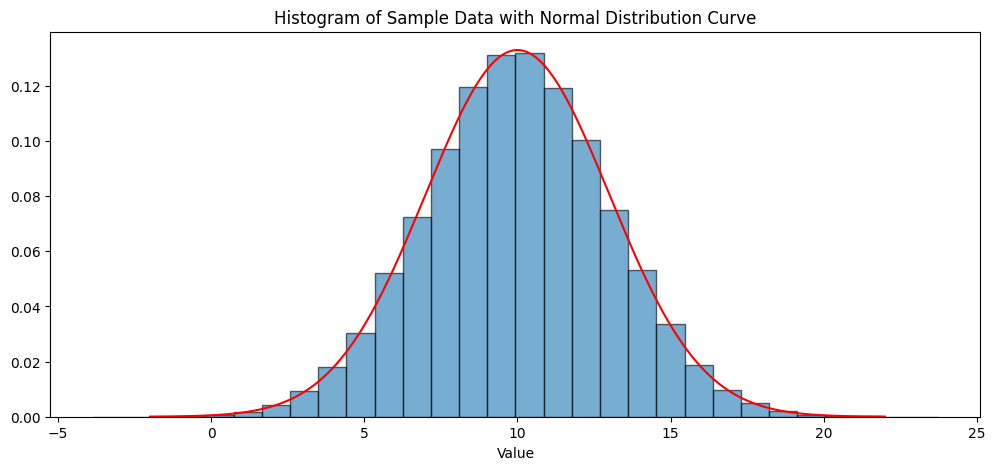

In [173]:
fig, ax = plt.subplots(figsize=(12, 5))

# Plot the histogram of the data with density normalization
ax.hist(sample, edgecolor='black', density=True, bins=30, alpha=0.6)

# Create an x range.
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# Get y values.
y = stats.norm.pdf(x, mean, std_dev)

# Plot the normal distribution curve
ax.plot(x, y, 'r-')

# Customize the plot
ax.set_title("Histogram of Sample Data with Normal Distribution Curve")
ax.set_xlabel("Value")
plt.show()

# Reference
- https://onecompiler.com/python/42azwxnth